In [101]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [102]:

%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

In [104]:
def f(z):
    return np.power(z, 2) - 1

print(f(0)) 

-1


In [106]:
z = [4, 1-0.2j, 1.6]

print(f(z))  

[15.  +0.j  -0.04-0.4j  1.56+0.j ]


In [108]:
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))

In [110]:
mesh = x + 1j*y

In [112]:
output = np.abs(f(mesh))

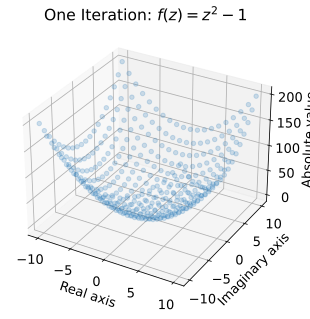

In [114]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('One Iteration: $f(z) = z^2 - 1$');


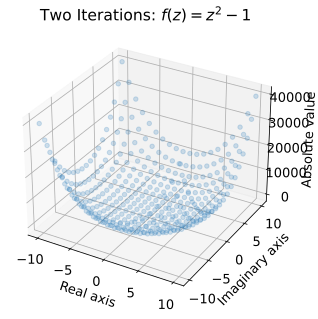

In [116]:
output = np.abs(f(f(mesh)))

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');


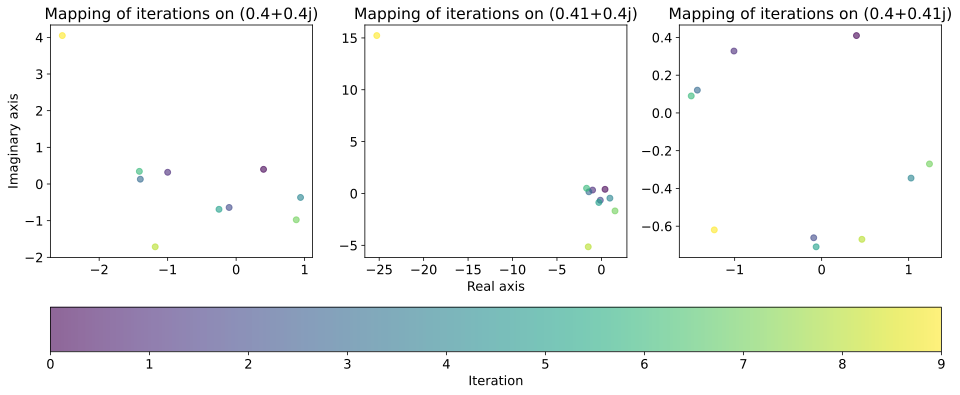

In [117]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros(
    (num_iter+1, selected_values.shape[0]),
    dtype=complex
)
outputs[0] = selected_values

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(
        data.real,
        data.imag,
        c=range(data.shape[0]), 
        alpha=0.6
    )
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location='bottom', label='Iteration');

In [118]:
def divergence_rate(mesh, num_iter=10, radius=2):
    z = mesh.copy()
    diverge_len = np.zeros(mesh.shape, dtype=int)

    for i in range(num_iter):
        conv_mask = np.abs(z) < radius
        diverge_len[conv_mask] = i + 1

        z[conv_mask] = f(z[conv_mask])

    return diverge_len

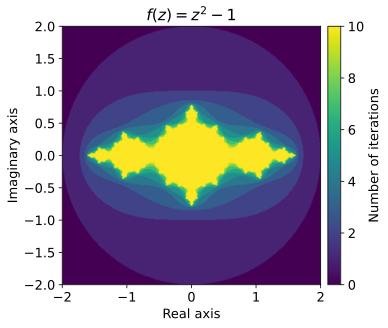

In [119]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');

In [ ]:
#201855091 유건희